In [18]:
import pandas as pd
import numpy as np

%matplotlib inline

pd.options.display.max_columns = None

In [3]:
dados_df = pd.read_csv('Dados Portuguese Tagger - Results Summary.csv')
dados_df

,Embedding,Tagging Scheme,Capitalisation Dim,Lower,Char LSTM Dim,Word LSTM Dim,Average F1 Score,Average F1 Score Without Outliers,Standard Deviation
0,FastText,iob,False,False,25,100,53.99,54.39,1.58
1,FastText,iob,False,False,25,200,53.89,54.10,1.00
2,FastText,iob,False,False,50,100,54.79,54.79,1.96
3,FastText,iob,False,False,50,200,54.56,54.56,1.51
4,FastText,iob,False,True,25,100,53.44,53.44,1.97
5,FastText,iob,False,True,25,200,53.28,53.28,0.91
6,FastText,iob,False,True,50,100,54.77,55.13,1.36
7,FastText,iob,False,True,50,200,54.19,54.19,1.26
8,FastText,iob,True,False,25,100,63.14,63.14,0.57
9,FastText,iob,True,False,25,200,63.07,63.28,0.79


In [21]:
dados_df.columns.values

array(['Embedding', 'Tagging Scheme', 'Capitalisation Dim', 'Lower',
       'Char LSTM Dim', 'Word LSTM Dim', 'Average F1 Score',
       'Average F1 Score Without Outliers', 'Standard Deviation'], dtype=object)

In [10]:
dados_df.groupby('Embedding').describe(percentiles=[])

Average F1 Score                                             \
                     count       mean       std    min     50%    max   
Embedding                                                               
FastText              32.0  58.736250  4.710408  53.28  58.760  64.14   
Glove                 32.0  55.701250  4.350329  49.47  55.505  61.10   
Wang2Vec              32.0  58.959062  5.694770  48.51  58.950  65.20   
Word2Vec              32.0  55.766250  5.271101  48.57  55.730  61.98   

          Average F1 Score Without Outliers                              \
                                      count       mean       std    min   
Embedding                                                                 
FastText                               32.0  58.831250  4.697102  53.28   
Glove                                  32.0  55.701250  4.350329  49.47   
Wang2Vec                               32.0  59.150937  5.450753  52.86   
Word2Vec                               32.0  55.817813  5.234742  48.57   

                         Char LSTM Dim                                     \
              50%    max         count  mean        std   min   50%   max   
Embedding                                                                   
FastText   59.020  64.37          32.0  37.5  12.700013  25.0  37.5  50.0   
Glove      55.505  61.10          32.0  37.5  12.700013  25.0  37.5  50.0   
Wang2Vec   59.345  65.20          32.0  37.5  12.700013  25.0  37.5  50.0   
Word2Vec   55.730  61.98          32.0  37.5  12.700013  25.0  37.5  50.0   

          Word LSTM Dim                                         
                  count   mean        std    min    50%    max  
Embedding                                                       
FastText           32.0  150.0  50.800051  100.0  150.0  200.0  
Glove              32.0  150.0  50.800051  100.0  150.0  200.0  
Wang2Vec           32.0  150.0  50.800051  100.0  150.0  200.0  
Word2Vec           32.0  150.0  50.800051  100.0  150.0  200.0

In [19]:
dados_df.pivot_table(columns=['Embedding'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                         \
Embedding                           FastText      Glove    Wang2Vec   
Average F1 Score                    58.73625   55.70125   58.959062   
Average F1 Score Without Outliers   58.83125   55.70125   59.150937   
Capitalisation Dim                   0.50000    0.50000    0.500000   
Char LSTM Dim                       37.50000   37.50000   37.500000   
Lower                                0.50000    0.50000    0.500000   
Standard Deviation                       NaN        NaN         NaN   
Tagging Scheme                           NaN        NaN         NaN   
Word LSTM Dim                      150.00000  150.00000  150.000000   

                                                  amax                  \
Embedding                            Word2Vec FastText  Glove Wang2Vec   
Average F1 Score                    55.766250    64.14   61.1     65.2   
Average F1 Score Without Outliers   55.817813    64.37   61.1     65.2   
Capitalisation Dim                   0.500000     True   True     True   
Char LSTM Dim                       37.500000       50     50       50   
Lower                                0.500000     True   True     True   
Standard Deviation                        NaN     3.27   3.06     2.95   
Tagging Scheme                            NaN    iobes  iobes    iobes   
Word LSTM Dim                      150.000000      200    200      200   

                                               amin                           \
Embedding                         Word2Vec FastText  Glove Wang2Vec Word2Vec   
Average F1 Score                     61.98    53.28  49.47    48.51    48.57   
Average F1 Score Without Outliers    61.98    53.28  49.47    52.86    48.57   
Capitalisation Dim                    True    False  False    False    False   
Char LSTM Dim                           50       25     25       25       25   
Lower                                 True    False  False    False    False   
Standard Deviation                   48.89     0.55   0.15     0.50  #DIV/0!   
Tagging Scheme                       iobes      iob    iob      iob      iob   
Word LSTM Dim                          200      100    100      100      100   

                                         std                                   
Embedding                           FastText      Glove   Wang2Vec   Word2Vec  
Average F1 Score                    4.710408   4.350329   5.694770   5.271101  
Average F1 Score Without Outliers   4.697102   4.350329   5.450753   5.234742  
Capitalisation Dim                  0.508001   0.508001   0.508001   0.508001  
Char LSTM Dim                      12.700013  12.700013  12.700013  12.700013  
Lower                               0.508001   0.508001   0.508001   0.508001  
Standard Deviation                       NaN        NaN        NaN        NaN  
Tagging Scheme                           NaN        NaN        NaN        NaN  
Word LSTM Dim                      50.800051  50.800051  50.800051  50.800051

In [22]:
dados_df.pivot_table(columns=['Tagging Scheme'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                  amax            \
Tagging Scheme                            iob       iobes       iob     iobes   
Average F1 Score                    57.473281   57.108125      65.2     64.74   
Average F1 Score Without Outliers   57.515937   57.234687      65.2     64.74   
Capitalisation Dim                   0.500000    0.500000      True      True   
Char LSTM Dim                       37.500000   37.500000        50        50   
Embedding                                 NaN         NaN  Word2Vec  Word2Vec   
Lower                                0.500000    0.500000      True      True   
Standard Deviation                        NaN         NaN      3.27     48.89   
Word LSTM Dim                      150.000000  150.000000       200       200   

                                       amin                  std             
Tagging Scheme                          iob     iobes        iob      iobes  
Average F1 Score                      49.47     48.51   5.216630   5.245741  
Average F1 Score Without Outliers     49.47     48.57   5.207742   5.142483  
Capitalisation Dim                    False     False   0.503953   0.503953  
Char LSTM Dim                            25        25  12.598816  12.598816  
Embedding                          FastText  FastText        NaN        NaN  
Lower                                 False     False   0.503953   0.503953  
Standard Deviation                     0.17   #DIV/0!        NaN        NaN  
Word LSTM Dim                           100       100  50.395263  50.395263

In [23]:
dados_df.pivot_table(columns=['Lower'], aggfunc=[np.mean, np.max, np.min, np.std])

mean                  amax            \
Lower                                   False       True      False     True    
Average F1 Score                    57.365000   57.216406      65.2     64.64   
Average F1 Score Without Outliers   57.489531   57.261094      65.2     64.64   
Capitalisation Dim                   0.500000    0.500000      True      True   
Char LSTM Dim                       37.500000   37.500000        50        50   
Embedding                                 NaN         NaN  Word2Vec  Word2Vec   
Standard Deviation                        NaN         NaN     48.89      3.27   
Tagging Scheme                            NaN         NaN     iobes     iobes   
Word LSTM Dim                      150.000000  150.000000       200       200   

                                       amin                  std             
Lower                                 False     True       False      True   
Average F1 Score                      48.51     48.57   5.186338   5.281046  
Average F1 Score Without Outliers     50.35     48.57   5.053268   5.295645  
Capitalisation Dim                    False     False   0.503953   0.503953  
Char LSTM Dim                            25        25  12.598816  12.598816  
Embedding                          FastText  FastText        NaN        NaN  
Standard Deviation                  #DIV/0!   #DIV/0!        NaN        NaN  
Tagging Scheme                          iob       iob        NaN        NaN  
Word LSTM Dim                           100       100  50.395263  50.395263

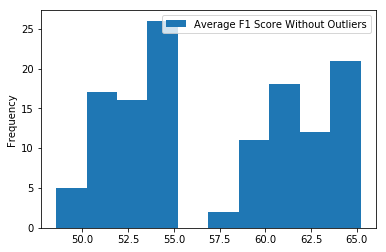

In [29]:
dados_df.plot(kind='hist', x='Embedding', y='Average F1 Score Without Outliers')

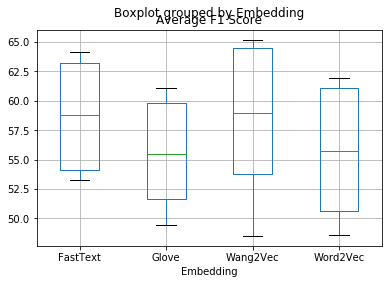

In [37]:
dados_df.boxplot(column='Average F1 Score Without Outliers', by='Embedding')

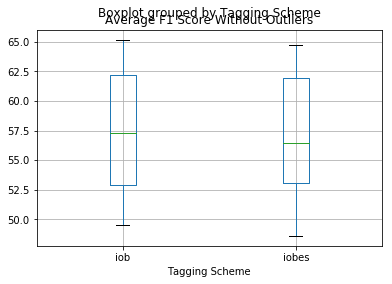

In [40]:
dados_df.boxplot(column='Average F1 Score Without Outliers', by='Tagging Scheme')

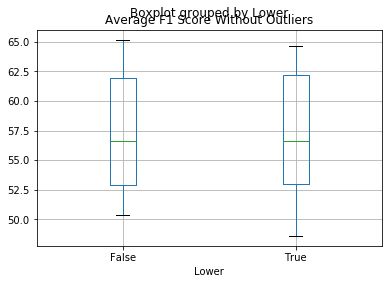

In [41]:
dados_df.boxplot(column='Average F1 Score Without Outliers', by='Lower')

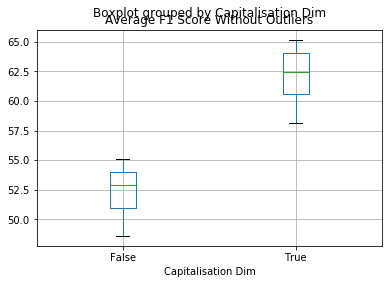

In [42]:
dados_df.boxplot(column='Average F1 Score Without Outliers', by='Capitalisation Dim')

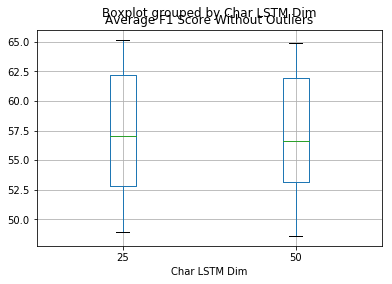

In [43]:
dados_df.boxplot(column='Average F1 Score Without Outliers', by='Char LSTM Dim')

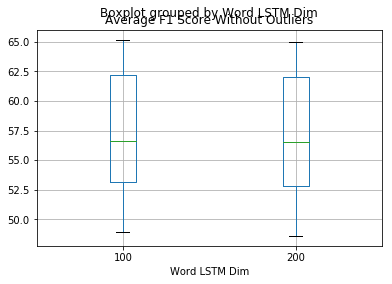

In [44]:
dados_df.boxplot(column='Average F1 Score Without Outliers', by='Word LSTM Dim')

In [3]:
processos_df['Numero'] = processos_df.apply(lambda row: str(row['Numero']).zfill(20) ,axis=1)

In [5]:
processos_df['Sentenca'].value_counts(dropna=False)

sem sentença                           14025
parcialmente procedente                 7915
acordo                                   800
Sentença não disponível                  552
improcedente                             340
procedente                               106
desistência                               70
ausência de pressuposto processuais       20
abandono de causa                          2
perempção                                  2
Name: Sentenca, dtype: int64

In [15]:
processos_df[processos_df['Sentenca'] == 'procedente']['Numero'].unique()

array(['10022475620165020466', '00107532820145150084',
       '00107870420155150137', '00111160520165150097',
       '00115514120145150002', '00109008320155150063',
       '00106897220175150032', '10014307820165020502',
       '00108054620165150151', '00116310620145150131',
       '10005668720155020433', '10007887220155020201',
       '00000431320155020039'], dtype=object)

In [6]:
print(len(processos_df['Numero'].unique()), 'processos distintos')

1889 processos distintos


In [19]:
processos_df['Tipo Sentenca'].value_counts(dropna=False)

NaN                                 14025
Extinção com resolução do mérito     9161
Sentença não identificada             552
Extinção sem resolução do mérito       94
Name: Tipo Sentenca, dtype: int64

In [26]:
processos_df[processos_df['Tipo Sentenca'] == 'Extinção com resolução do mérito']['Numero'].unique()

array(['10027112320155020464', '10025943320165020614',
       '10025720220165020605', '10027148120155020462',
       '10026546120135020468', '10022896720165020705',
       '10024895220155020465', '10023158520175020202',
       '10022740420165020704', '10025242820165020610',
       '10023828120165020009', '10023455720155020472',
       '10023958420165020040', '00109225320175150102',
       '10025051020165020614', '10022626420165020065',
       '10022311320165020431', '10022183920165020067',
       '10022537220165020463', '10022756020145020606',
       '00104372420155150102', '10024211220165020613',
       '00126551320155150009', '00108881520165150102',
       '00127348920155150009', '10024635720155020464',
       '00102752920155150102', '00120727020165150016',
       '10022475620165020466', '00108571720155150009',
       '00119341320155150122', '10022006320155020613',
       '10022266320165020601', '10022037020145020607',
       '00116167820155150009', '10021819220165020008',
       '00

In [47]:
processos_df[processos_df['Tipo Sentenca'] == 'Sentença não identificada']['Numero'].unique()

array(['00119670320155150122', '00100673620145150084',
       '00100533720155150013', '00108518920165150133',
       '00112545120155150082', '00107504520155150082',
       '00127086720155150017', '00108948320165150017',
       '00121583820165150017', '00113564020165150017',
       '00114981520145150017', '00111436820155150017',
       '00109579120155150034', '00008963820135150004',
       '00114746520155150012', '00122915120165150059',
       '00106592420175150101', '00104437320165150012',
       '00107600220155150014', '00118934620155150122',
       '00122572320165150109', '00103025420165150109',
       '00006401320145150020', '00118009520155150021',
       '00006622820145150002', '00104294420175150145',
       '00002727220135150041', '00013012620135150020',
       '00122046720155150015', '00111437420155150015',
       '00107440620175150070', '00111901120175150037',
       '00102415320135150028', '00120399820155150086',
       '00102246620165150010', '00115860620165150010',
       '00

In [46]:
processos_df[(processos_df['Tipo Sentenca'] == 'Sentença não identificada')]['Sentenca'].unique()

array(['Sentença não disponível'], dtype=object)

In [44]:
processos_df[(processos_df['Tipo Sentenca'] == 'Extinção sem resolução do mérito')]['Sentenca'].unique()

array(['ausência de pressuposto processuais', 'desistência',
       'abandono de causa', 'perempção'], dtype=object)

In [45]:
processos_df[(processos_df['Tipo Sentenca'] == 'Extinção com resolução do mérito')]['Sentenca'].unique()

array(['parcialmente procedente', 'improcedente', 'acordo', 'procedente'], dtype=object)

In [48]:
processos_df[(processos_df['Sentenca'] == 'improcedente')]['Numero'].unique()

array(['10022896720165020705', '10021845520165020070',
       '00100118520155150013', '00100353120145150084',
       '00120726020165150084', '10018694420165020711',
       '00124555020145150135', '00124546520145150135',
       '00106721420145150041', '00106808820145150041',
       '00106838720135150070', '00106820520135150070',
       '00118447920165150086', '00115876720155150093',
       '00112030720155150093', '00114472220165150053',
       '00130556320165150018', '10015157320165020014',
       '10014189520145020385', '10013346620165020016',
       '10012737620155020717', '10012734320165020361',
       '10012984520175020612', '10008792920155020601',
       '00105166120145150094', '00109305620155150019',
       '10010593820165020204', '10005511120165020037',
       '10002358820165020492', '10007971120155020241',
       '10001866520175020701', '10004057920175020442',
       '10004022620175020701', '10003272220165020054',
       '00011778220145020048'], dtype=object)

In [72]:
processos_df[processos_df['Numero'] == '10000683120165020473']

,Número de registros,Assunto,Bloqueio,Classe Cnj,Comarca Tratada,Data Bloqueio,Data Distribuicao Por Andamento,Data Distribuicao Tratada,Data Revelia,Data Sentenca,Data Sentenca Mais Recente,Escritorio,Fonte,Instancia Tratada,Is Cliente,Juiz,Nome,Nome Parte,Numero,Papel,Pedido De Liminar,Pertence Cliente,Processo Mongoid,Revelia,Sentenca,Status,Tipo Sentenca,Uf,Valor Acao,Valor Acordo,Valor Condenacao,Vara Original,Vara Tipo
21245,1,"MULTA DE 40% DO FGTS, MULTA DO ARTIGO 467 DA C...",Falso,NaN,NaN,NaN,21/01/2016,21/01/2016,NaN,NaN,NaN,NaN,pjetrt_02,2ᵃ Instância,Verdadeiro,CARLOS ROBERTO HUSEK,ALCIDIO COSTA MANSO,BK BRASIL OPERACAO E ASSESSORIA A RESTAURANTES...,10000683120165020473,RECORRENTE,NaN,NaN,5a6f465094e85bcb22a5e62a,Falso,sem sentença,ativo,NaN,SP,NaN,NaN,NaN,Tribunal Pleno,NaN
21246,1,"MULTA DE 40% DO FGTS, MULTA DO ARTIGO 467 DA C...",Falso,NaN,NaN,NaN,21/01/2016,21/01/2016,NaN,NaN,NaN,NaN,pjetrt_02,2ᵃ Instância,Verdadeiro,CARLOS ROBERTO HUSEK,TATIANE ARAUJO DE CARVALHO ALSINA,BK BRASIL OPERACAO E ASSESSORIA A RESTAURANTES...,10000683120165020473,RECORRENTE,NaN,NaN,5a6f465094e85bcb22a5e62a,Falso,sem sentença,ativo,NaN,SP,NaN,NaN,NaN,Tribunal Pleno,NaN
21247,1,"MULTA DE 40% DO FGTS, MULTA DO ARTIGO 467 DA C...",Falso,NaN,NaN,NaN,21/01/2016,21/01/2016,NaN,NaN,NaN,NaN,pjetrt_02,2ᵃ Instância,Verdadeiro,CARLOS ROBERTO HUSEK,DANIELLE DE OLIVEIRA TORRES,BK BRASIL OPERACAO E ASSESSORIA A RESTAURANTES...,10000683120165020473,RECORRENTE,NaN,Verdadeiro,5a6f465094e85bcb22a5e62a,Falso,sem sentença,ativo,NaN,SP,NaN,NaN,NaN,Tribunal Pleno,NaN
21248,1,"MULTA DE 40% DO FGTS, MULTA DO ARTIGO 467 DA C...",Falso,NaN,NaN,NaN,21/01/2016,21/01/2016,NaN,NaN,NaN,NaN,pjetrt_02,2ᵃ Instância,Verdadeiro,CARLOS ROBERTO HUSEK,CARLOS MARTINS DE OLIVEIRA,BK BRASIL OPERACAO E ASSESSORIA A RESTAURANTES...,10000683120165020473,RECORRENTE,NaN,Verdadeiro,5a6f465094e85bcb22a5e62a,Falso,sem sentença,ativo,NaN,SP,NaN,NaN,NaN,Tribunal Pleno,NaN
21249,1,"MULTA DE 40% DO FGTS, MULTA DO ARTIGO 467 DA C...",Falso,NaN,NaN,NaN,21/01/2016,21/01/2016,NaN,NaN,NaN,NaN,pjetrt_02,2ᵃ Instância,Verdadeiro,CARLOS ROBERTO HUSEK,PRISCILA MARIA FERRAO MILAGRES,BK BRASIL OPERACAO E ASSESSORIA A RESTAURANTES...,10000683120165020473,RECORRENTE,NaN,Verdadeiro,5a6f465094e85bcb22a5e62a,Falso,sem sentença,ativo,NaN,SP,NaN,NaN,NaN,Tribunal Pleno,NaN
21250,1,"MULTA DE 40% DO FGTS, MULTA DO ARTIGO 467 DA C...",Falso,NaN,NaN,NaN,21/01/2016,21/01/2016,NaN,NaN,NaN,NaN,pjetrt_02,2ᵃ Instância,NaN,CARLOS ROBERTO HUSEK,ALCIDIO COSTA MANSO,JOAO PATRICIO FERREIRA JUNIOR,10000683120165020473,RECORRIDO,NaN,NaN,5a6f465094e85bcb22a5e62a,Falso,sem sentença,ativo,NaN,SP,NaN,NaN,NaN,Tribunal Pleno,NaN
21251,1,"MULTA DE 40% DO FGTS, MULTA DO ARTIGO 467 DA C...",Falso,NaN,NaN,NaN,21/01/2016,21/01/2016,NaN,NaN,NaN,NaN,pjetrt_02,2ᵃ Instância,NaN,CARLOS ROBERTO HUSEK,TATIANE ARAUJO DE CARVALHO ALSINA,JOAO PATRICIO FERREIRA JUNIOR,10000683120165020473,RECORRIDO,NaN,NaN,5a6f465094e85bcb22a5e62a,Falso,sem sentença,ativo,NaN,SP,NaN,NaN,NaN,Tribunal Pleno,NaN
21252,1,"MULTA DE 40% DO FGTS, MULTA DO ARTIGO 467 DA C...",Falso,NaN,NaN,NaN,21/01/2016,21/01/2016,NaN,NaN,NaN,NaN,pjetrt_02,2ᵃ Instância,NaN,CARLOS ROBERTO HUSEK,DANIELLE DE OLIVEIRA TORRES,JOAO PATRICIO FERREIRA JUNIOR,10000683120165020473,RECORRIDO,NaN,Verdadeiro,5a6f465094e85bcb22a5e62a,Falso,sem sentença,ativo,NaN,SP,NaN,NaN,NaN,Tribunal Pleno,NaN
21253,1,"MULTA DE 40% DO FGTS, MULTA DO ARTIGO 467 DA C...",Falso,NaN,NaN,NaN,21/01/2016,21/01/2016,NaN,NaN,NaN,NaN,pjetrt_02,2ᵃ Instância,NaN,CARLOS ROBERTO HUSEK,CARLOS MARTINS DE OLIVEIRA,JOAO PATRICIO FERREIRA JUNIOR,10000683120165020473,RECORRIDO,NaN,Verdadeiro,5a6f465094e85bcb22a5e62a,Falso,sem sentença,ativo,NaN,SP,NaN,NaN,NaN,Tribunal Pleno,NaN
21254,1,"MULTA DE 40% DO FGTS, MULTA DO ARTIGO 467 DA C...",Falso,NaN,NaN,NaN,21/01/2016,21/01/2016,NaN,NaN,NaN,NaN,pjetrt_02,2ᵃ Instância,NaN,CARLOS ROBERTO HUSEK,PRISCILA MARIA FERRAO MILAGRES,JOAO PATRICIO FERREIRA JUNIOR,10000683120165020473,RECORRIDO,Na

In [42]:
processos_df[(processos_df['Numero'] == '00106820520135150070') & (processos_df['Instancia Tratada'] == '1ᵃ Instância')]

,Número de registros,Assunto,Bloqueio,Classe Cnj,Comarca Tratada,Data Bloqueio,Data Distribuicao Por Andamento,Data Distribuicao Tratada,Data Revelia,Data Sentenca,Data Sentenca Mais Recente,Escritorio,Fonte,Instancia Tratada,Is Cliente,Juiz,Nome,Nome Parte,Numero,Papel,Pedido De Liminar,Pertence Cliente,Processo Mongoid,Revelia,Sentenca,Status,Tipo Sentenca,Uf,Valor Acao,Valor Acordo,Valor Condenacao,Vara Original,Vara Tipo
371,1,"ASSÉDIO MORAL, CESTA BÁSICA, INDENIZAÇÃO POR D...",Falso,NaN,TAUBATÉ,NaN,06/03/2015,06/03/2015,NaN,23/10/2015 08:57:00,NaN,NaN,pjetrt_15,1ᵃ Instância,NaN,NaN,PRISCILA MARIA FERRAO MILAGRES,ALEX SANDER ALVES DE SOUZA,00104372420155150102,Autor,NaN,Verdadeiro,5a6f284f94e85bcb22a1d404,Falso,acordo,arquivado,Extinção com resolução do mérito,SP,NaN,NaN,NaN,(0102 - 2ª Vara do Trabalho de Taubaté),Vara Cível
372,1,"ASSÉDIO MORAL, CESTA BÁSICA, INDENIZAÇÃO POR D...",Falso,NaN,TAUBATÉ,NaN,06/03/2015,06/03/2015,NaN,23/10/2015 08:57:00,NaN,NaN,pjetrt_15,1ᵃ Instância,NaN,NaN,ANA MARIA DOMINGUES SILVA RIBEIRO,ALEX SANDER ALVES DE SOUZA,00104372420155150102,Autor,NaN,NaN,5a6f284f94e85bcb22a1d404,Falso,acordo,arquivado,Extinção com resolução do mérito,SP,NaN,NaN,NaN,(0102 - 2ª Vara do Trabalho de Taubaté),Vara Cível
373,1,"ASSÉDIO MORAL, CESTA BÁSICA, INDENIZAÇÃO POR D...",Falso,NaN,TAUBATÉ,NaN,06/03/2015,06/03/2015,NaN,23/10/2015 08:57:00,NaN,NaN,pjetrt_15,1ᵃ Instância,NaN,NaN,LUIZ EDUARDO MARCHTEIN,ALEX SANDER ALVES DE SOUZA,00104372420155150102,Autor,NaN,NaN,5a6f284f94e85bcb22a1d404,Falso,acordo,arquivado,Extinção com resolução do mérito,SP,NaN,NaN,NaN,(0102 - 2ª Vara do Trabalho de Taubaté),Vara Cível
377,1,"ASSÉDIO MORAL, CESTA BÁSICA, INDENIZAÇÃO POR D...",Falso,NaN,TAUBATÉ,NaN,06/03/2015,06/03/2015,NaN,23/10/2015 08:57:00,NaN,NaN,pjetrt_15,1ᵃ Instância,NaN,NaN,PRISCILA MARIA FERRAO MILAGRES,ADISER COMERCIO DE ALIMENTOS LTDA,00104372420155150102,Réu,NaN,Verdadeiro,5a6f284f94e85bcb22a1d404,Falso,acordo,arquivado,Extinção com resolução do mérito,SP,NaN,NaN,NaN,(0102 - 2ª Vara do Trabalho de Taubaté),Vara Cível
378,1,"ASSÉDIO MORAL, CESTA BÁSICA, INDENIZAÇÃO POR D...",Falso,NaN,TAUBATÉ,NaN,06/03/2015,06/03/2015,NaN,23/10/2015 08:57:00,NaN,NaN,pjetrt_15,1ᵃ Instância,NaN,NaN,ANA MARIA DOMINGUES SILVA RIBEIRO,ADISER COMERCIO DE ALIMENTOS LTDA,00104372420155150102,Réu,NaN,NaN,5a6f284f94e85bcb22a1d404,Falso,acordo,arquivado,Extinção com resolução do mérito,SP,NaN,NaN,NaN,(0102 - 2ª Vara do Trabalho de Taubaté),Vara Cível
379,1,"ASSÉDIO MORAL, CESTA BÁSICA, INDENIZAÇÃO POR D...",Falso,NaN,TAUBATÉ,NaN,06/03/2015,06/03/2015,NaN,23/10/2015 08:57:00,NaN,NaN,pjetrt_15,1ᵃ Instância,NaN,NaN,LUIZ EDUARDO MARCHTEIN,ADISER COMERCIO DE ALIMENTOS LTDA,00104372420155150102,Réu,NaN,NaN,5a6f284f94e85bcb22a1d404,Falso,acordo,arquivado,Extinção com resolução do mérito,SP,NaN,NaN,NaN,(0102 - 2ª Vara do Trabalho de Taubaté),Vara Cível
380,1,"ASSÉDIO MORAL, CESTA BÁSICA, INDENIZAÇÃO POR D...",Falso,NaN,TAUBATÉ,NaN,06/03/2015,06/03/2015,NaN,23/10/2015 08:57:00,NaN,NaN,pjetrt_15,1ᵃ Instância,Verdadeiro,NaN,PRISCILA MARIA FERRAO MILAGRES,BK BRASIL OPERACAO E ASSESSORIA A RESTAURANTES...,00104372420155150102,Réu,NaN,Verdadeiro,5a6f284f94e85bcb22a1d404,Falso,acordo,arquivado,Extinção com resolução do mérito,SP,NaN,NaN,NaN,(0102 - 2ª Vara do Trabalho de Taubaté),Vara Cível
381,1,"ASSÉDIO MORAL, CESTA BÁSICA, INDENIZAÇÃO POR D...",Falso,NaN,TAUBATÉ,NaN,06/03/2015,06/03/2015,NaN,23/10/2015 08:57:00,NaN,NaN,pjetrt_15,1ᵃ Instância,Verdadeiro,NaN,ANA MARIA DOMINGUES SILVA RIBEIRO,BK BRASIL OPERACAO E ASSESSORIA A RESTAURANTES...,00104372420155150102,Réu,NaN,NaN,5a6f284f94e85bcb22a1d404,Falso,acordo,arquivado,Extinção com resolução do mérito,SP,NaN,NaN,NaN,(0102 - 2ª Vara do Trabalho de Taubaté),Vara Cível
382,1,"ASSÉDIO MORAL, CESTA BÁSICA, INDENIZAÇÃO POR D...",Falso,NaN,TAUBATÉ,NaN,06/03/2015,06/03/2015,NaN,23/10/2015 08:57:00,NaN,NaN,pjetrt_15,1ᵃ Instância,Verdadeiro,NaN,LUIZ EDUARDO MARCHTEIN,BK BRASIL OPERACAO E ASSESSORIA A RESTAURANTES...,0

In [10]:
processos_df[processos_df['Nome Parte'] == 'BK BRASIL OPERACAO E ASSESSORIA A RESTAURANTES S.A.'].count()

Número de registros                9021
Assunto                            8965
Bloqueio                           9021
Classe Cnj                            0
Comarca Tratada                    5699
Data Bloqueio                         0
Data Distribuicao Por Andamento    9021
Data Distribuicao Tratada          9021
Data Revelia                          0
Data Sentenca                      3404
Data Sentenca Mais Recente            0
Escritorio                            0
Fonte                              9021
Instancia Tratada                  9021
Is Cliente                         9021
Juiz                               7049
Nome                               9018
Nome Parte                         9021
Numero                             9021
Papel                              9021
Pedido De Liminar                   261
Pertence Cliente                   4452
Processo Mongoid                   9021
Revelia                            9021
Sentenca                           9021


In [13]:
processos_deferidos_df = processos_df[processos_df['Pedido De Liminar'] == 'deferido']

In [14]:
processos_deferidos_df['Numero'].unique()

array(['00118714820155150102', '00126799220175150034',
       '00111289020155150020', '00109866420165150113',
       '00114467120145150032', '10012574320165020053',
       '10006677020175020202'], dtype=object)

In [19]:
processos_indeferidos_df = processos_df[processos_df['Pedido De Liminar'] == 'indeferido']

In [21]:
processos_indeferidos_df['Numero'].unique()

array(['10024266020175020205', '00102752920155150102',
       '00108571720155150009', '00119341320155150122',
       '00119670320155150122', '00125291120175150132',
       '00114172520155150084', '00100118520155150013',
       '00108677820175150013', '10021636620175020063',
       '10018654520175020202', '10018037520165020384',
       '00122886020165150071', '00122545820155150059',
       '00123141120165150022', '00118934620155150122',
       '10017322220175020713', '10017394020175020090',
       '00132116520175150002', '10028137820175020204',
       '10016484920175020057', '00126879720155150015',
       '00122872020145150015', '00107035320145150067',
       '00102632620155150066', '10015440320175020075',
       '00105757420165150063', '10016389720175020382',
       '00116026520175150093', '10020697920175020464',
       '00114216420175150093', '10020453820165020027',
       '00100530320175150131', '10020316020165020316',
       '00122522320145150092', '10020209120175020511',
       '00

In [58]:
#,'Instancia Tratada'
#processos_df[processos_df['Status'] == 'suspenso']['Numero']
processos_suspensos_df = processos_df[processos_df['Status'] == 'suspenso']

In [70]:
processos_suspensos_df = processos_suspensos_df[['Numero','Instancia Tratada']].drop_duplicates()
processos_suspensos_df.sort_values(by='Numero')

,Numero,Instancia Tratada
23242,00003501020155020057,1ᵃ Instância
21785,00019666320155020075,1ᵃ Instância
6752,00112929620165150092,2ᵃ Instância
20950,00115955920175150130,1ᵃ Instância
21263,10000683120165020473,1ᵃ Instância
21383,10000764020135020464,1ᵃ Instância
11165,10012178120175020714,1ᵃ Instância
9480,10014189520145020385,2ᵃ Instância
4088,10017536320135020381,2ᵃ Instância
3548,10017690820135020384,1ᵃ Instância


In [73]:
processos_arquivados_df = processos_df[processos_df['Status'] == 'arquivado']
processos_arquivados_df = processos_arquivados_df[['Numero','Instancia Tratada']].drop_duplicates()
processos_arquivados_df.sort_values(by='Numero')

,Numero,Instancia Tratada
21313,00000431320155020039,NaN
5850,00001158720145150066,1ᵃ Instância
7462,00002694020135150002,1ᵃ Instância
3620,00002727220135150041,1ᵃ Instância
21240,00002877920155020058,NaN
21323,00002907820155020011,NaN
21329,00003175020135020005,NaN
21235,00003501020155020057,NaN
21215,00003612420145020041,NaN
5351,00004126820145150010,1ᵃ Instância
